# Import Dependencies

In [2]:
import atd2022
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import dtw
pd.options.display.max_columns = None

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Import Data

In [84]:
data = atd2022.io.read_csv()

In [85]:
data

Region                 AA                                                      \
Event                  01 02  03  04 05   06 07 08 09 10 11 12 13 14 15 16 17   
2013-12-30/2014-01-05   0  0   0   6  0    0  0  0  0  0  0  0  0  0  0  0  0   
2014-01-06/2014-01-12   2  0   0  11  0    1  0  0  0  0  0  0  0  0  0  0  0   
2014-01-13/2014-01-19   0  1   3   7  1    0  0  0  0  0  1  0  0  0  0  0  0   
2014-01-20/2014-01-26   0  1   0   4  0    0  0  2  0  0  0  0  0  0  0  1  0   
2014-01-27/2014-02-02   6  1  59   3  0  103  0  4  0  0  0  0  0  0  0  0  0   
...                    .. ..  ..  .. ..  ... .. .. .. .. .. .. .. .. .. .. ..   
2018-01-08/2018-01-14  13  9  20  85  4    2  0  2  8  0  0  0  0  0  0  1  8   
2018-01-15/2018-01-21  14  5   8  10  1    0  0  1  0  1  0  1  0  0  0  0  3   
2018-01-22/2018-01-28   5  2   0  23  3    2  5  1  0  0  2  0  0  0  0  3  4   
2018-01-29/2018-02-04   3  2   7  37  6   10  4  7  0  1  1  1  0  0  0  0  0   
2018-02-05/2018-02-11   7  6   7  49  6    0  1  2  2  2  6  0  1  0  0  0  2   

Region                          AC                                           \
Event                 18 19 20  01  02  03   04  05 06  07  08 09 10  11 12   
2013-12-30/2014-01-05  0  0  0   4   4   6    9   0  0   1   1  1  0   1  0   
2014-01-06/2014-01-12  0  0  0   5   0   8   34   2  1   1   0  0  0   0  2   
2014-01-13/2014-01-19  0  1  0   1   0   4    3   0  2   0   0  0  0   0  0   
2014-01-20/2014-01-26  0  0  0   3   0   6    1   1  0   0   0  0  0   2  0   
2014-01-27/2014-02-02  0  0  0   8   2   2   47   6  4   3   0  0  0   0  2   
...                   .. .. ..  ..  ..  ..  ...  .. ..  ..  .. .. ..  .. ..   
2018-01-08/2018-01-14  0  0  0  34   9  14  107   3  2   6   3  0  1   8  7   
2018-01-15/2018-01-21  0  2  0  36  11  13   67  18  6   7  12  7  5  20  2   
2018-01-22/2018-01-28  0  4  0  24  13   9   40  12  9   4   5  1  3  21  5   
2018-01-29/2018-02-04  0  0  0  21  13  12   46  17  6  10   6  1  4  17  1   
2018-02-05/2018-02-11  0  4  0  32  12  23   64  13  8   7  28  4  4  12  3   

Region                                             AE                       \
Event                  13 14 15 16  17 18  19 20   01   02   03    04   05   
2013-12-30/2014-01-05   0  0  0  0  11  0   0  0  180   72  149   326  197   
2014-01-06/2014-01-12   0  0  0  0   4  0   3  0  303  138  206   914  360   
2014-01-13/2014-01-19   0  0  0  0   1  1   1  0  271  162  253   595  259   
2014-01-20/2014-01-26   0  0  0  0   0  0   3  0  138   65  109   352  105   
2014-01-27/2014-02-02   1  0  0  0   3  0   0  0  436  213  326  1135  313   
...                    .. .. .. ..  .. ..  .. ..  ...  ...  ...   ...  ...   
2018-01-08/2018-01-14  16  1  0  2   3  0  18  0  421  204  340   975  494   
2018-01-15/2018-01-21   3  0  0  0   1  0   6  0  474  182  596  1277  390   
2018-01-22/2018-01-28   1  1  0  1   2  0   6  0  516  201  710  1301  444   
2018-01-29/2018-02-04   2  1  0  0   9  0   4  0  419  190  411  1011  441   
2018-02-05/2018-02-11   4  0  0  0  15  0   1  0  639  250  946  2613  603   

Region                                                                      \
Event                   06   07   08  09  10   11  12  13  14  15  16   17   
2013-12-30/2014-01-05   51   60   29  26  16   80  20   3   5   1   8   50   
2014-01-06/2014-01-12  101  103  181  78  34  129  30  41   9   7  22  258   
2014-01-13/2014-01-19   89   82   66  28  22  107  44  25  13   1  18  153   
2014-01-20/2014-01-26   33   35   12  12   7   33  23  12   6   1   7   74   
2014-01-27/2014-02-02   95  134   68  37  40  133  32  44  14  12  18  161   
...                    ...  ...  ...  ..  ..  ...  ..  ..  ..  ..  ..  ...   
2018-01-08/2018-01-14   87  111   82  58  31  158  67  33  25  13  23  169   
2018-01-15/2018-01-21  106  169   85  50  35  160  65  21  14   6  55  139   
2018-01-22/2018-01-28  135  156   98  93  59  270  62  33  29   6  33  153   
2018-01-29/2018-02-04  101  164  172  61  40 

In [6]:
test_region=data["AA"]

In [7]:
ts1=test_region["01"]

In [8]:
ts2=test_region["02"]

In [22]:
len(data)


215

In [106]:
from itertools import combinations

elements = ["01", "02","03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]



comb = combinations(elements, 2)

In [105]:
temp_region_ls = []


for region in data: 

    
    for p in temp_region_ls:
        if p == region[0]:
            temp_region_ls.remove(region[0])

    temp_region_ls.append(region[0])


In [127]:
comb = combinations(elements, 2)

min_dis = [] 

tmp_lst=list(comb)
last_ele=tmp_lst[-1]

cur=0

for region in temp_region_ls: 
    test_region = data[region] # assuming this will iterate correctly

    region_list = []
    region_list_names = []
    for combo in tmp_lst:
        test1 = test_region[combo[0]]
        test2 = test_region[combo[1]]
        comparison = dtw.dtw(test1, test2, keep_internals=False)
        
        region_list.append(comparison.normalizedDistance)
        region_list_names.append(combo)
        #print(combo)
        cur+=1
        print(cur)

        if combo==last_ele:
            x = np.argsort(region_list)
            temp_list = []
            temp_list.append(region)
            temp_list.append(region_list_names[x[0]])
            temp_list.append(region_list_names[x[1]])
            temp_list.append(region_list_names[x[2]])
            temp_list.append(region_list_names[x[3]])
            temp_list.append(region_list_names[x[4]])

            min_dis.append(temp_list)
       

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [128]:
test=pd.DataFrame(data=min_dis)

In [132]:
test.head()

0         1         2         3         4         5
0  AA  (15, 20)  (14, 15)  (15, 16)  (10, 15)  (14, 16)
1  AC  (15, 20)  (14, 15)  (15, 18)  (14, 18)  (14, 20)
2  AE  (15, 20)  (14, 15)  (10, 13)  (13, 14)  (10, 18)
3  AF  (15, 16)  (14, 16)  (14, 15)  (09, 10)  (14, 20)
4  AG  (15, 20)  (15, 16)  (10, 15)  (10, 16)  (16, 20)

In [129]:
test[1].describe()

count          260
unique          22
top       (15, 20)
freq           175
Name: 1, dtype: object

In [138]:
test[1].value_counts()

(15, 20)    175
(14, 20)     14
(14, 15)     12
(18, 20)      8
(06, 16)      8
(15, 16)      8
(16, 20)      6
(01, 02)      6
(14, 16)      5
(13, 15)      3
(14, 18)      3
(10, 14)      2
(12, 16)      1
(10, 20)      1
(11, 20)      1
(09, 14)      1
(10, 18)      1
(15, 18)      1
(16, 18)      1
(08, 10)      1
(13, 16)      1
(09, 10)      1
Name: 1, dtype: int64

In [130]:
test[2].describe()

count          260
unique          42
top       (14, 15)
freq            57
Name: 2, dtype: object

In [139]:
test[2].value_counts()

(14, 15)    57
(15, 16)    40
(14, 16)    23
(15, 18)    22
(15, 20)    15
(16, 20)    10
(10, 16)     9
(14, 20)     8
(10, 13)     8
(10, 15)     6
(14, 18)     5
(13, 15)     5
(10, 18)     5
(09, 10)     4
(13, 16)     4
(08, 18)     3
(18, 20)     3
(10, 14)     3
(16, 18)     2
(10, 20)     2
(13, 20)     2
(09, 13)     2
(06, 10)     2
(09, 15)     2
(05, 14)     1
(09, 19)     1
(09, 18)     1
(06, 16)     1
(13, 14)     1
(06, 09)     1
(08, 17)     1
(08, 16)     1
(07, 10)     1
(05, 10)     1
(02, 09)     1
(09, 16)     1
(08, 11)     1
(06, 15)     1
(08, 20)     1
(08, 10)     1
(13, 18)     1
(08, 13)     1
Name: 2, dtype: int64

In [131]:
test[3].describe()

count          260
unique          39
top       (15, 16)
freq            38
Name: 3, dtype: object

In [133]:
test[4].describe()

count          260
unique          42
top       (15, 16)
freq            31
Name: 4, dtype: object

In [134]:
test[5].describe()

count          260
unique          45
top       (15, 16)
freq            21
Name: 5, dtype: object

# DTW

In [9]:
DTW = dtw.dtw(ts1, ts2, keep_internals=True)

2.8651162790697673

In [10]:
DTW.costMatrix

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 8.820e+02, 8.840e+02,
        8.900e+02],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 6.380e+02, 6.380e+02,
        6.420e+02],
       [2.000e+00, 2.000e+00, 3.000e+00, ..., 6.400e+02, 6.400e+02,
        6.460e+02],
       ...,
       [2.242e+03, 2.242e+03, 2.056e+03, ..., 1.230e+03, 1.233e+03,
        1.234e+03],
       [2.245e+03, 2.245e+03, 2.058e+03, ..., 1.229e+03, 1.230e+03,
        1.233e+03],
       [2.252e+03, 2.252e+03, 2.064e+03, ..., 1.234e+03, 1.235e+03,
        1.232e+03]])

In [11]:
test = pd.DataFrame(data=DTW.costMatrix)

In [12]:
test

0       1       2       3       4       5       6       7       8    \
0       0.0     0.0     1.0     2.0     3.0     3.0     3.0     6.0     6.0   
1       2.0     2.0     2.0     3.0     4.0     5.0     5.0     5.0     7.0   
2       2.0     2.0     3.0     4.0     5.0     4.0     4.0     7.0     5.0   
3       2.0     2.0     3.0     4.0     5.0     4.0     4.0     7.0     5.0   
4       8.0     8.0     8.0     9.0    10.0    10.0    10.0    10.0    11.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
210  2223.0  2223.0  2039.0  2039.0  2039.0  2040.0  2040.0  1740.0  1743.0   
211  2237.0  2237.0  2052.0  2052.0  2052.0  2054.0  2054.0  1751.0  1757.0   
212  2242.0  2242.0  2056.0  2056.0  2056.0  2059.0  2059.0  1753.0  1758.0   
213  2245.0  2245.0  2058.0  2058.0  2058.0  2061.0  2062.0  1753.0  1756.0   
214  2252.0  2252.0  2064.0  2064.0  2064.0  2068.0  2069.0  1757.0  1763.0   

        9       10      11      12      13      14      15      16      17   \
0       8.0     8.0    10.0    12.0    17.0    19.0    22.0    29.0    30.0   
1       6.0     8.0     8.0     8.0    11.0    11.0    12.0    17.0    18.0   
2       7.0     6.0     8.0    10.0    15.0    13.0    15.0    22.0    19.0   
3       7.0     6.0     8.0    10.0    15.0    15.0    18.0    25.0    20.0   
4      11.0    12.0    12.0    14.0    12.0    16.0    19.0    20.0    25.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
210  1741.0  1745.0  1743.0  1745.0  1514.0  1517.0  1516.0  1337.0  1343.0   
211  1753.0  1759.0  1755.0  1757.0  1523.0  1529.0  1527.0  1344.0  1356.0   
212  1756.0  1761.0  1758.0  1760.0  1523.0  1526.0  1528.0  1346.0  1350.0   
213  1757.0  1760.0  1759.0  1760.0  1525.0  1525.0  1525.0  1350.0  1350.0   
214  1762.0  1767.0  1764.0  1765.0  1527.0  1530.0  1529.0  1350.0  1356.0   

        18      19      20      21      22      23      24      25      26   \
0      31.0    32.0    34.0    38.0    44.0    44.0    45.0    46.0    46.0   
1      19.0    20.0    20.0    22.0    26.0    28.0    29.0    30.0    32.0   
2      20.0    21.0    22.0    26.0    32.0    26.0    27.0    28.0    28.0   
3      21.0    22.0    24.0    28.0    34.0    26.0    27.0    28.0    28.0   
4      26.0    27.0    28.0    28.0    28.0    32.0    32.0    33.0    34.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
210  1344.0  1345.0  1345.0  1344.0  1342.0  1353.0  1352.0  1353.0  1355.0   
211  1357.0  1358.0  1357.0  1354.0  1350.0  1364.0  1365.0  1366.0  1369.0   
212  1354.0  1358.0  1360.0  1355.0  1351.0  1356.0  1360.0  1364.0  1369.0   
213  1352.0  1354.0  1355.0  1356.0  1354.0  1357.0  1359.0  1361.0  1364.0   
214  1358.0  1360.0  1360.0  1359.0  1355.0  1362.0  1365.0  1367.0  1371.0   

        27      28      29      30      31      32      33      34      35   \
0      55.0    64.0    66.0    68.0    72.0    73.0    74.0    75.0    77.0   
1      39.0    46.0    46.0    46.0    48.0    49.0    50.0    51.0    51.0   
2      37.0    46.0    48.0    48.0    52.0    50.0    51.0    52.0    53.0   
3      37.0    46.0    48.0    50.0    54.0    51.0    52.0    53.0    55.0   
4      34.0    37.0    41.0    45.0    47.0    52.0    57.0    58.0    59.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
210  1245.0  1245.0  1244.0  1245.0  1244.0  1248.0  1249.0  1250.0  1250.0   
211  1250.0  1250.0  1256.0  1257.0  1254.0  1261.0  1262.0  1263.0  1262.0   
212  1254.0  1254.0  1256.0  1259.0  1255.0  1259.0  1263.0  1267.0  1265.0   
213  1260.0  1260.0  1256.0  1257.0  1256.0  1258.0  1260.0  1262.0  1263.0   
214  1262.0  1262.0  1261.0  1262.0  1259.0  1264.0  1266.0  1268.0  1268.0   

        36      37      38      39      40      41      42      43      44   \
0      80.0    81.0    84.0    84.0    84.0    85.0    85.0    85.0    86.0   
1      52.0    53.0    54.0    56.0    58.0    59.0   

In [13]:
DTW.index1

array([  0,   0,   0,   0,   0,   0,   0,   1,   2,   3,   3,   4,   5,
         6,   6,   7,   8,   9,  10,  11,  12,  13,  13,  14,  15,  16,
        17,  18,  18,  18,  19,  20,  21,  22,  22,  23,  23,  24,  25,
        25,  26,  27,  28,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  49,  49,  49,  49,  49,  49,  50,  51,  52,  52,  52,  52,
        53,  54,  55,  55,  55,  55,  55,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  63,  64,  65,  66,  67,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  97,  97,  97,
        97,  98,  99, 100, 101, 101, 101, 101, 101, 101, 101, 101, 102,
       103, 104, 105, 105, 105, 105, 105, 106, 107, 108, 109, 110, 111,
       112, 112, 112, 112, 112, 112, 113, 114, 115, 116, 117, 11

In [14]:
DTW.plot(type="twoway")

ValueError: cannot convert float NaN to integer

In [15]:

def dp(dist_mat):
    """
    Find minimum-cost path through matrix `dist_mat` using dynamic programming.

    The cost of a path is defined as the sum of the matrix entries on that
    path. See the following for details of the algorithm:

    - http://en.wikipedia.org/wiki/Dynamic_time_warping
    - https://www.ee.columbia.edu/~dpwe/resources/matlab/dtw/dp.m

    The notation in the first reference was followed, while Dan Ellis's code
    (second reference) was used to check for correctness. Returns a list of
    path indices and the cost matrix.
    """

    N, M = dist_mat.shape
    
    # Initialize the cost matrix
    cost_mat = np.zeros((N + 1, M + 1))
    for i in range(1, N + 1):
        cost_mat[i, 0] = np.inf
    for i in range(1, M + 1):
        cost_mat[0, i] = np.inf

    # Fill the cost matrix while keeping traceback information
    traceback_mat = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_mat[i, j],      # match (0)
                cost_mat[i, j + 1],  # insertion (1)
                cost_mat[i + 1, j]]  # deletion (2)
            i_penalty = np.argmin(penalty)
            cost_mat[i + 1, j + 1] = dist_mat[i, j] + penalty[i_penalty]
            traceback_mat[i, j] = i_penalty

    # Traceback from bottom right
    i = N - 1
    j = M - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        tb_type = traceback_mat[i, j]
        if tb_type == 0:
            # Match
            i = i - 1
            j = j - 1
        elif tb_type == 1:
            # Insertion
            i = i - 1
        elif tb_type == 2:
            # Deletion
            j = j - 1
        path.append((i, j))

    # Strip infinity edges from cost_mat before returning
    cost_mat = cost_mat[1:, 1:]
    return (path[::-1], cost_mat)

In [16]:
x=ts1
y=ts2

In [17]:
# Distance matrix
N = x.shape[0]
M = y.shape[0]
dist_mat = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        dist_mat[i, j] = abs(x[i] - y[j])

Alignment cost: 1074.0000
Normalized alignment cost: 2.4977


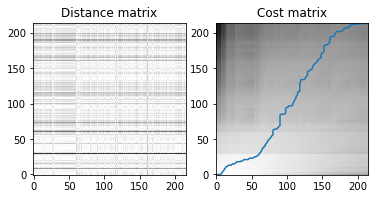

In [18]:

# DTW
path, cost_mat = dp(dist_mat)
print("Alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]))
print("Normalized alignment cost: {:.4f}".format(cost_mat[N - 1, M - 1]/(N + M)))

plt.figure(figsize=(6, 4))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(dist_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_mat, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

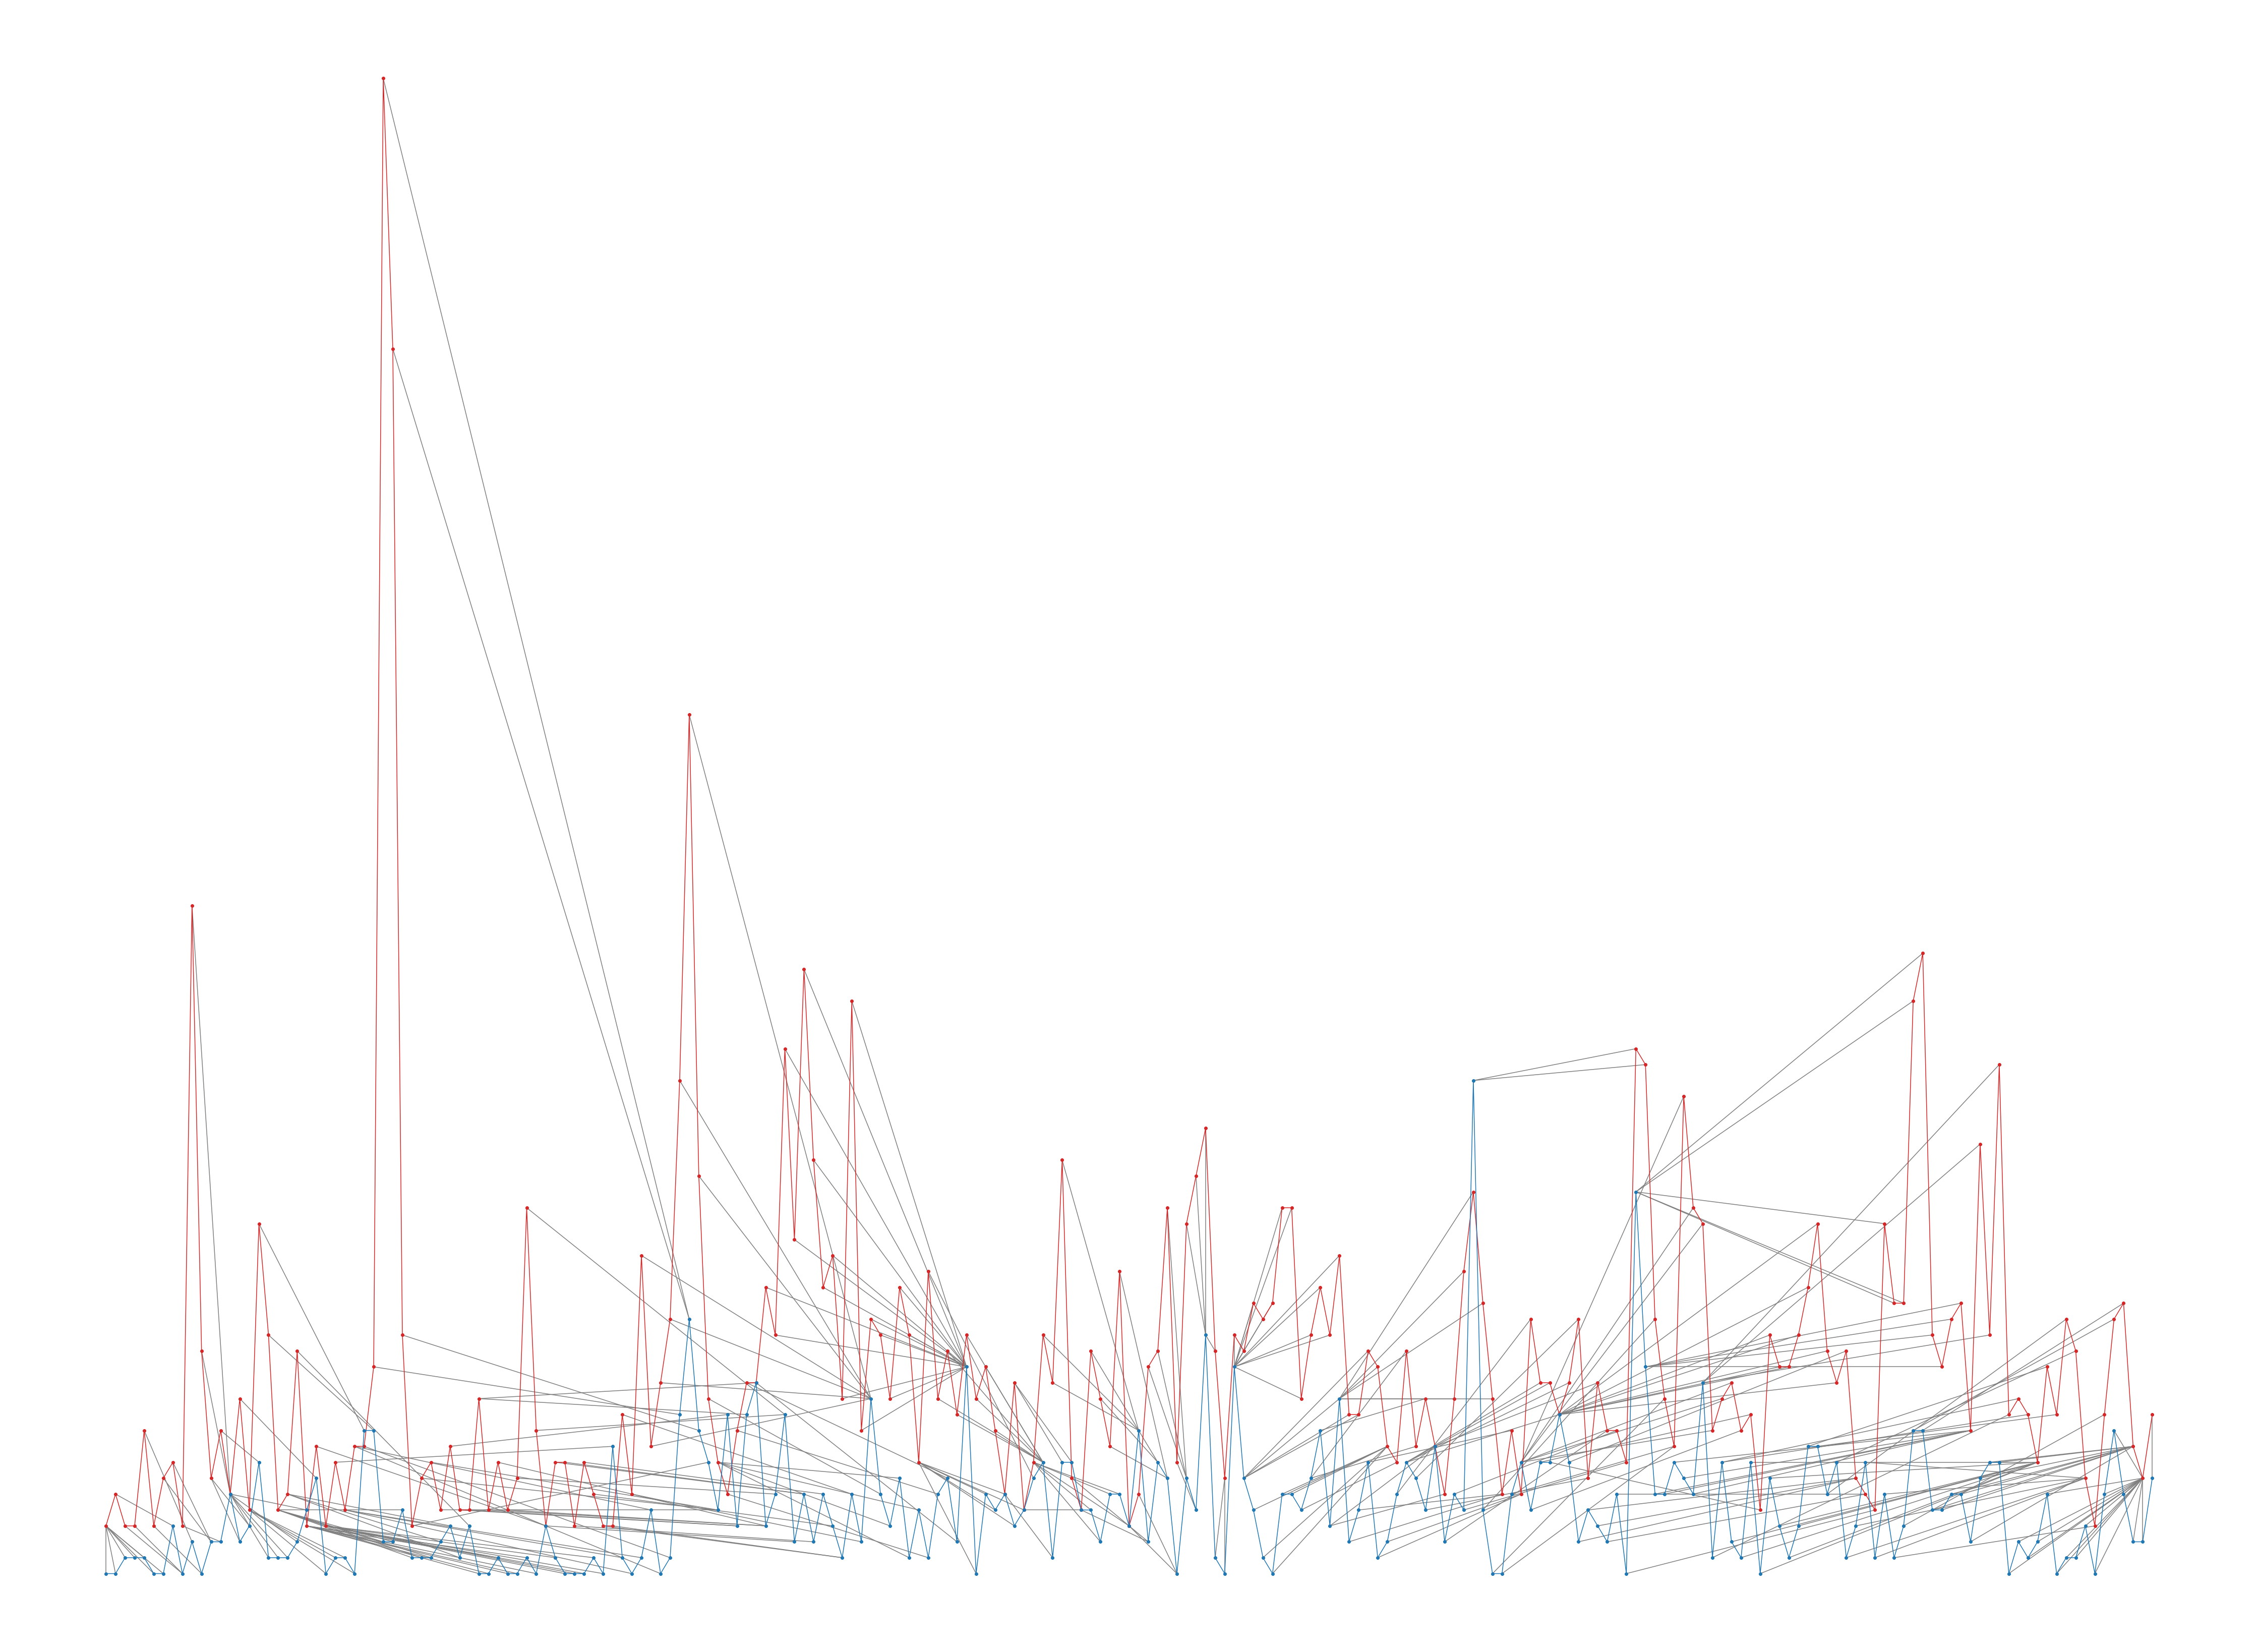

In [19]:
# Plot alignment
plt.figure(figsize=(80, 60))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("off");

In [ ]:
from dtw import * 